# Chapter 8: How to analyze the data

In [1]:
import pandas as pd
import seaborn as sns

## Pg 274 - How to melt columns to create long data

In [2]:
# Pg 275
cars = pd.read_pickle('cars.pkl')

cars.info(memory_usage = 'deep')

cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aspiration  205 non-null    object 
 1   carbody     205 non-null    object 
 2   enginesize  205 non-null    int64  
 3   curbweight  205 non-null    int64  
 4   price       205 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 29.8 KB


,aspiration,carbody,enginesize,curbweight,price
0,std,convertible,130,2548,13495.0
1,std,convertible,130,2548,16500.0
2,std,hatchback,152,2823,16500.0
3,std,sedan,109,2337,13950.0
4,std,sedan,136,2824,17450.0


In [3]:
# Pg 275
cars_melted = pd.melt(cars, id_vars='price',
                      value_vars=['enginesize','curbweight'],
                      var_name='feature', value_name='featureValue')

cars_melted.info(memory_usage = 'deep')

cars_melted


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         410 non-null    float64
 1   feature       410 non-null    object 
 2   featureValue  410 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.4 KB


,price,feature,featureValue
0,13495.0,enginesize,130
1,16500.0,enginesize,130
2,16500.0,enginesize,152
3,13950.0,enginesize,109
4,17450.0,enginesize,136
...,...,...,...
405,16845.0,curbweight,2952
406,19045.0,curbweight,3049
407,21485.0,curbweight,3012
408,22470.0,curbweight,3217


## Pg 276 - How to plot melted columns

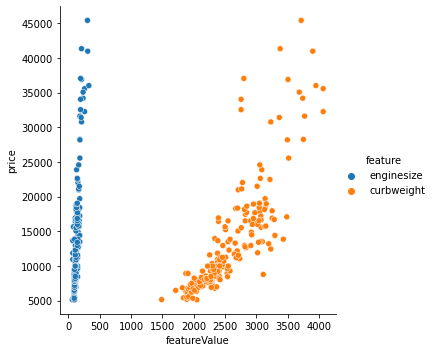

In [4]:
# Pg 277
sns.relplot(data=cars_melted, x='featureValue', y='price', 
            hue='feature');

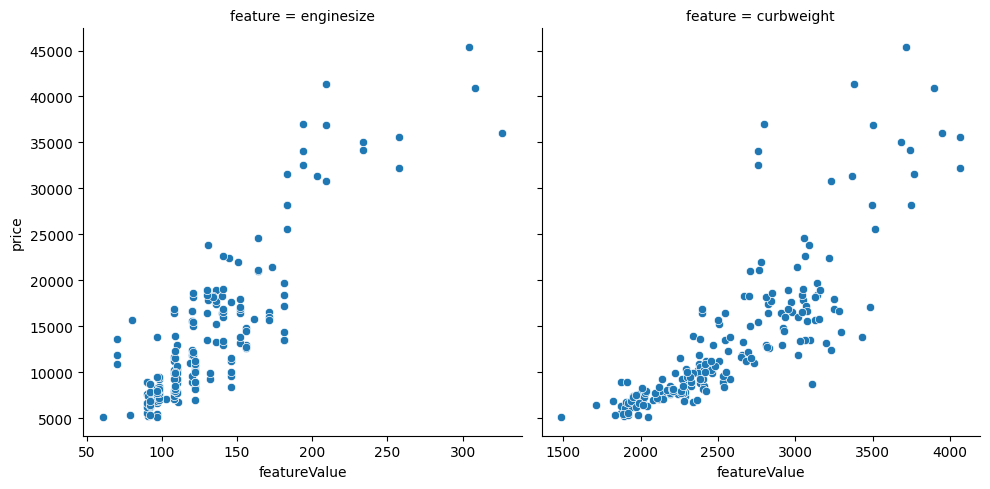

In [5]:
# Pg 277
sns.relplot(data=cars_melted, x='featureValue', y='price', 
            col='feature', facet_kws={'sharex':False});

##  Pg 278 - How to group and apply a single aggregate method

In [6]:
# Pg 279 get the data
fires = pd.read_pickle('fires_prepared.pkl')
fires = fires.reset_index(drop=True)

fires.info(memory_usage = 'deep')

fires.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274123 entries, 0 to 274122
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   fire_name       128667 non-null  object        
 1   fire_year       274123 non-null  int64         
 2   state           274123 non-null  object        
 3   discovery_date  274123 non-null  datetime64[ns]
 4   contain_date    137376 non-null  datetime64[ns]
 5   acres_burned    274123 non-null  float64       
 6   fire_month      274123 non-null  int64         
 7   days_burning    137376 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 39.7 MB


,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning
0,Power,2004,CA,2004-10-06,2004-10-21,16823.0,10,15.0
1,Freds,2004,CA,2004-10-13,2004-10-17,7700.0,10,4.0
2,Bachelor,2004,NM,2004-07-20,2004-07-20,10.0,7,0.0


In [7]:
# Pg 279 

fires.groupby('state').mean().head(3)

,fire_year,acres_burned,fire_month,days_burning
state,,,,
AK,2004.742504,11367.199362,6.264198,32.081535
AL,2003.885422,42.348169,5.022529,0.272676
AR,2005.850793,50.281673,5.581081,0.400992


In [8]:
# Pg 279 

fires.groupby(['state','fire_year','fire_month']).max().dropna().head(3)

/tmp/ipykernel_244663/291792523.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  fires.groupby(['state','fire_year','fire_month']).max().dropna().head(3)


discovery_date contain_date  acres_burned  \
state fire_year fire_month                                             
AK    1992      5              1992-05-31   1992-06-22        1410.0   
                6              1992-06-29   1992-09-17       48087.0   
                7              1992-07-30   1992-09-17       35090.0   

                            days_burning  
state fire_year fire_month                
AK    1992      5                   50.0  
                6                   82.0  
                7                   77.0

## Pg 280 - How to work with a DataFrameGroupBy object

In [9]:
# Pg 281 

fires.head(3)

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning
0,Power,2004,CA,2004-10-06,2004-10-21,16823.0,10,15.0
1,Freds,2004,CA,2004-10-13,2004-10-17,7700.0,10,4.0
2,Bachelor,2004,NM,2004-07-20,2004-07-20,10.0,7,0.0


In [10]:
# Pg 281 

yearly_group = fires.groupby('fire_year')
yearly_sums = yearly_group.sum()
yearly_sums.head(3)

,acres_burned,fire_month,days_burning
fire_year,,,
1992,2123889.91,45643,6230.0
1993,2118394.10,52880,7283.0
1994,4033880.06,57669,20158.0


In [11]:
# Pg 281 

yearly_group = fires.groupby('fire_year', as_index=False)
yearly_sums = yearly_group.sum()
yearly_sums.head(3)

,fire_year,acres_burned,fire_month,days_burning
0,1992,2123889.91,45643,6230.0
1,1993,2118394.10,52880,7283.0
2,1994,4033880.06,57669,20158.0


## Pg 282 - How to apply multiple aggregate methods

In [12]:
# Pg 283 

monthly_group = fires.groupby(['state','fire_year','fire_month'])

In [13]:
# Pg 283 

monthly_group.agg(['sum','count','mean']).head(3)

/tmp/ipykernel_244663/3933424351.py:3: FutureWarning: ['fire_name', 'discovery_date', 'contain_date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  monthly_group.agg(['sum','count','mean']).head(3)


acres_burned                    days_burning        \
                                    sum count         mean          sum count   
state fire_year fire_month                                                      
AK    1992      5                4202.0    15   280.133333        135.0    14   
                6               86401.0    26  3323.115385        417.0    25   
                7               48516.7    26  1866.026923        500.0    22   

                                       
                                 mean  
state fire_year fire_month             
AK    1992      5            9.642857  
                6           16.680000  
                7           22.727273

In [14]:
# Pg 283 

monthly_group.days_burning.agg(['sum','count','mean']).head(3)

sum  count       mean
state fire_year fire_month                         
AK    1992      5           135.0     14   9.642857
                6           417.0     25  16.680000
                7           500.0     22  22.727273

In [15]:
# Pg 283

df = monthly_group.agg({'acres_burned':['sum','max','min'],
                   'days_burning':['sum','mean'],
                   'fire_name':'count'})
df.head(3)

acres_burned                days_burning  \
                                    sum      max   min          sum   
state fire_year fire_month                                            
AK    1992      5                4202.0   1410.0  10.0        135.0   
                6               86401.0  48087.0  10.0        417.0   
                7               48516.7  35090.0  10.0        500.0   

                                      fire_name  
                                 mean     count  
state fire_year fire_month                       
AK    1992      5            9.642857        14  
                6           16.680000        23  
                7           22.727273        26

## Pg 284 - How to use the pivot() method

In [16]:
# Pg 285

states = ['AK','CA','ID','TX']
top_states = fires.groupby(['state','fire_year'], as_index=False).sum()
top_states = top_states.query('state in @states')
top_states.head(2)

,state,fire_year,acres_burned,fire_month,days_burning
0,AK,1992,142444.7,454,1145.0
1,AK,1993,686630.5,961,3373.0


In [17]:
# Pg 285

top_states.pivot(index='fire_year', columns='state', values='acres_burned').head(5)

state,AK,CA,ID,TX
fire_year,,,,
1992,142444.7,289254.9,683495.2,31500.3
1993,686630.5,315011.1,7658.5,114265.5
1994,261604.7,401619.2,727133.0,69200.2
1995,43762.6,210519.3,268047.5,53015.8
1996,598407.2,700022.4,895505.1,211119.3


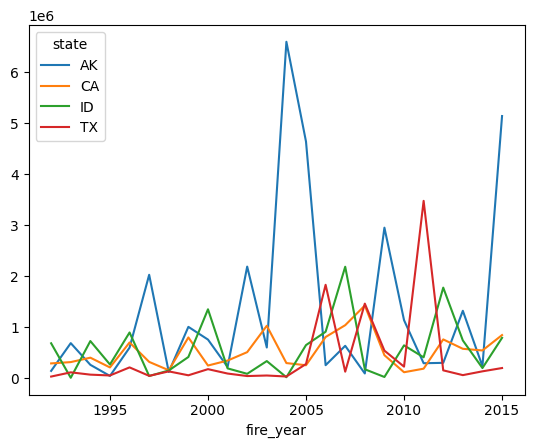

In [18]:
# Pg 285

top_states.pivot(index='fire_year', columns='state', values='acres_burned').plot();

## Pg 286 - How to use the pivot_table() method

In [19]:
# Pg 287

states = ['AK','CA','ID','TX']
fires_top_4 = fires.query('state in @states')
fires_top_4 = fires_top_4.pivot_table(index='fire_year', columns='state', 
                                     values='acres_burned', aggfunc='sum')
fires_top_4.head(2)

state,AK,CA,ID,TX
fire_year,,,,
1992,142444.7,289254.9,683495.2,31500.3
1993,686630.5,315011.1,7658.5,114265.5


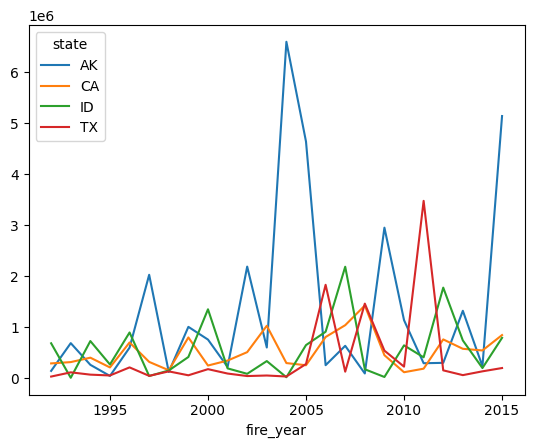

In [20]:
# Pg 287

fires_top_4.plot();

## Pg 288 - How to create bins of equal size

In [21]:
# Pg 289

fires_filtered = fires.query('fire_year == 2010 and days_burning > 0').dropna()

In [22]:
# Pg 289

pd.cut(fires_filtered.acres_burned, bins=4)

173229    (-296.103, 76535.75]
173230    (-296.103, 76535.75]
173231    (-296.103, 76535.75]
173232    (-296.103, 76535.75]
173233    (-296.103, 76535.75]
                  ...         
273969    (-296.103, 76535.75]
274046    (-296.103, 76535.75]
274049    (-296.103, 76535.75]
274081    (-296.103, 76535.75]
274116    (-296.103, 76535.75]
Name: acres_burned, Length: 1858, dtype: category
Categories (4, interval[float64, right]): [(-296.103, 76535.75] < (76535.75, 153061.5] < (153061.5, 229587.25] < (229587.25, 306113.0]]

In [23]:
# Pg 289

pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000])

173229    (0, 100000]
173230    (0, 100000]
173231    (0, 100000]
173232    (0, 100000]
173233    (0, 100000]
             ...     
273969    (0, 100000]
274046    (0, 100000]
274049    (0, 100000]
274081    (0, 100000]
274116    (0, 100000]
Name: acres_burned, Length: 1858, dtype: category
Categories (4, interval[int64, right]): [(0, 100000] < (100000, 200000] < (200000, 300000] < (300000, 400000]]

In [24]:
# Pg 289

pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000],
       labels=['small','medium','large','very large'])

173229    small
173230    small
173231    small
173232    small
173233    small
          ...  
273969    small
274046    small
274049    small
274081    small
274116    small
Name: acres_burned, Length: 1858, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [25]:
# Pg 289

pd.cut(fires_filtered.acres_burned, bins=[0,100000,200000,300000,400000],
       labels=['small','medium','large','very large']).value_counts()

small         1855
medium           2
very large       1
large            0
Name: acres_burned, dtype: int64

## Pg 290 - How to create bins with equal numbers of unique items

In [26]:
# Pg 291

pd.qcut(fires_filtered.acres_burned, q=4,
        labels=['small','medium','large','very large'])

173229         small
173230    very large
173231    very large
173232         large
173233        medium
             ...    
273969         small
274046        medium
274049        medium
274081         small
274116        medium
Name: acres_burned, Length: 1858, dtype: category
Categories (4, object): ['small' < 'medium' < 'large' < 'very large']

In [27]:
# Pg 291

pd.qcut(fires_filtered.acres_burned, q=4,
        labels=['small','medium','large','very large']).value_counts()

small         466
medium        465
very large    464
large         463
Name: acres_burned, dtype: int64

In [28]:
# Pg 291

fires_filtered['fire_size'] = pd.qcut(fires_filtered.acres_burned, q=4,
    labels=['small','medium','large','very large'])

In [29]:
# Pg 291

pd.qcut(fires_filtered.days_burning, q=4,
        labels=['short','medium','long'], duplicates='drop').value_counts()

short     1018
long       433
medium     407
Name: days_burning, dtype: int64

## Pg 292 - How to plot the binned data

In [30]:
# Pg 293

fires_filtered.head(5)

,fire_name,fire_year,state,discovery_date,contain_date,acres_burned,fire_month,days_burning,fire_size
173229,Fourmile Trail,2010,AK,2010-04-28,2010-05-05,16.8,4,7.0,small
173230,Granite Tors,2010,AK,2010-05-27,2010-08-11,7880.0,5,76.0,very large
173231,Goldbug Creek,2010,AK,2010-06-23,2010-06-28,2777.0,6,5.0,very large
173232,Broken Tree,2010,AK,2010-05-24,2010-07-08,112.0,5,45.0,large
173233,Folger Creek,2010,AK,2010-07-01,2010-07-16,90.0,7,15.0,medium


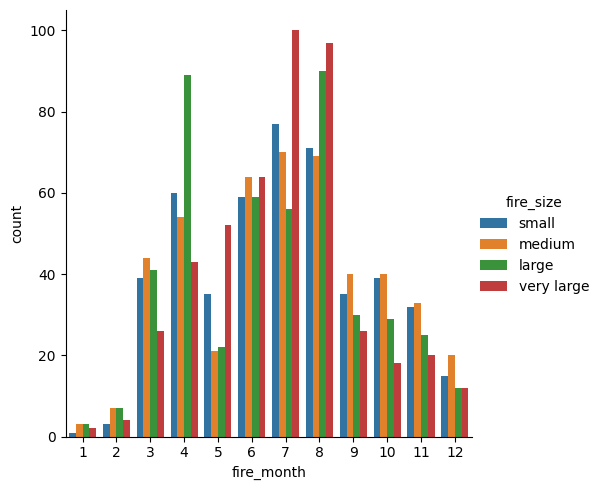

In [31]:
# Pg 293

sns.catplot(data=fires_filtered, kind='count', x='fire_month', hue='fire_size');

## Pg 294 - How to select the rows with the largest values

In [32]:
# Pg 295

cars.nlargest(n=6, columns='enginesize')

,aspiration,carbody,enginesize,curbweight,price
49,std,sedan,326,3950,36000.0
73,std,sedan,308,3900,40960.0
74,std,hardtop,304,3715,45400.0
47,std,sedan,258,4066,32250.0
48,std,sedan,258,4066,35550.0
71,std,sedan,234,3740,34184.0


In [33]:
# Pg 295

cars.nlargest(n=6, columns=['enginesize','price'])

,aspiration,carbody,enginesize,curbweight,price
49,std,sedan,326,3950,36000.0
73,std,sedan,308,3900,40960.0
74,std,hardtop,304,3715,45400.0
48,std,sedan,258,4066,35550.0
47,std,sedan,258,4066,32250.0
72,std,convertible,234,3685,35056.0


## Pg 296 - How to calculate percent change

In [47]:
# Pg 297

df = fires[['state','fire_year','acres_burned']] \
    .groupby(['state','fire_year']).sum()
df.head

<bound method NDFrame.head of                  acres_burned
state fire_year              
AK    1992          142444.70
      1993          686630.50
      1994          261604.70
      1995           43762.60
      1996          598407.20
...                       ...
WY    2011          134336.25
      2012          481206.46
      2013           53884.90
      2014            7179.43
      2015           36233.50

[1148 rows x 1 columns]>

In [48]:
# Pg 297

df.pct_change()

acres_burned
state fire_year              
AK    1992                NaN
      1993           3.820330
      1994          -0.619002
      1995          -0.832715
      1996          12.673941
...                       ...
WY    2011           0.552941
      2012           2.582104
      2013          -0.888021
      2014          -0.866764
      2015           4.046849

[1148 rows x 1 columns]

## Pg 298 - How to rank rows

In [49]:
# Pg 299

df = fires.groupby('state').sum() \
    [['acres_burned','fire_year','days_burning']]
df.head(3)

,acres_burned,fire_year,days_burning
state,,,
AK,3.222601e+07,5683445,80268.0
AL,8.101628e+05,38336332,2886.0
AR,4.502221e+05,17960388,1132.0


In [50]:
# Pg 299

df['acres_rank'] = df.acres_burned.rank(ascending=False)
df.head(3)

,acres_burned,fire_year,days_burning,acres_rank
state,,,,
AK,3.222601e+07,5683445,80268.0,1.0
AL,8.101628e+05,38336332,2886.0,23.0
AR,4.502221e+05,17960388,1132.0,27.0


In [59]:
# Pg 299

df['days_rank'] = df.days_burning.rank(method='max')
df.sort_values('days_burning').head(10)

,acres_burned,fire_year,days_burning,acres_rank,days_rank
state,,,,,
RI,147.45,22092,0.0,51.0,1.0
VT,985.70,46240,6.0,50.0,3.0
CT,7358.20,364159,6.0,46.0,3.0
NH,1232.23,82240,9.0,49.0,4.0
DE,4674.50,38055,11.0,47.0,5.0
IA,65292.45,2289724,20.0,38.0,6.0
MA,4632.00,102541,37.0,48.0,7.0
ME,14935.70,582034,52.0,45.0,8.0
MD,64404.48,675686,78.0,39.0,9.0
